In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [38]:
# Load dataset
df = pd.read_csv('loan_data.csv')
print(df.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Exploratory Data Analysis
print("Dataset Overview:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['loan_status'].value_counts())

Dataset Overview:
    person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         

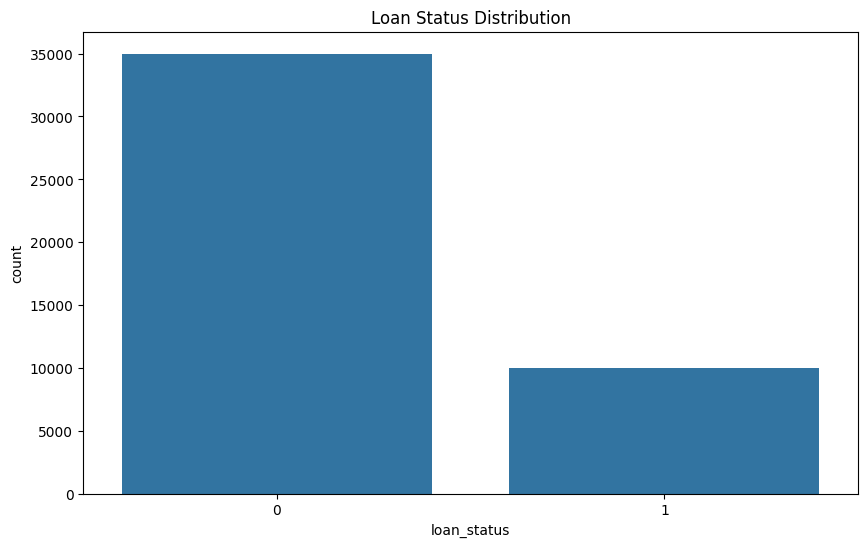

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['loan_status'])
plt.title("Loan Status Distribution")
plt.show()

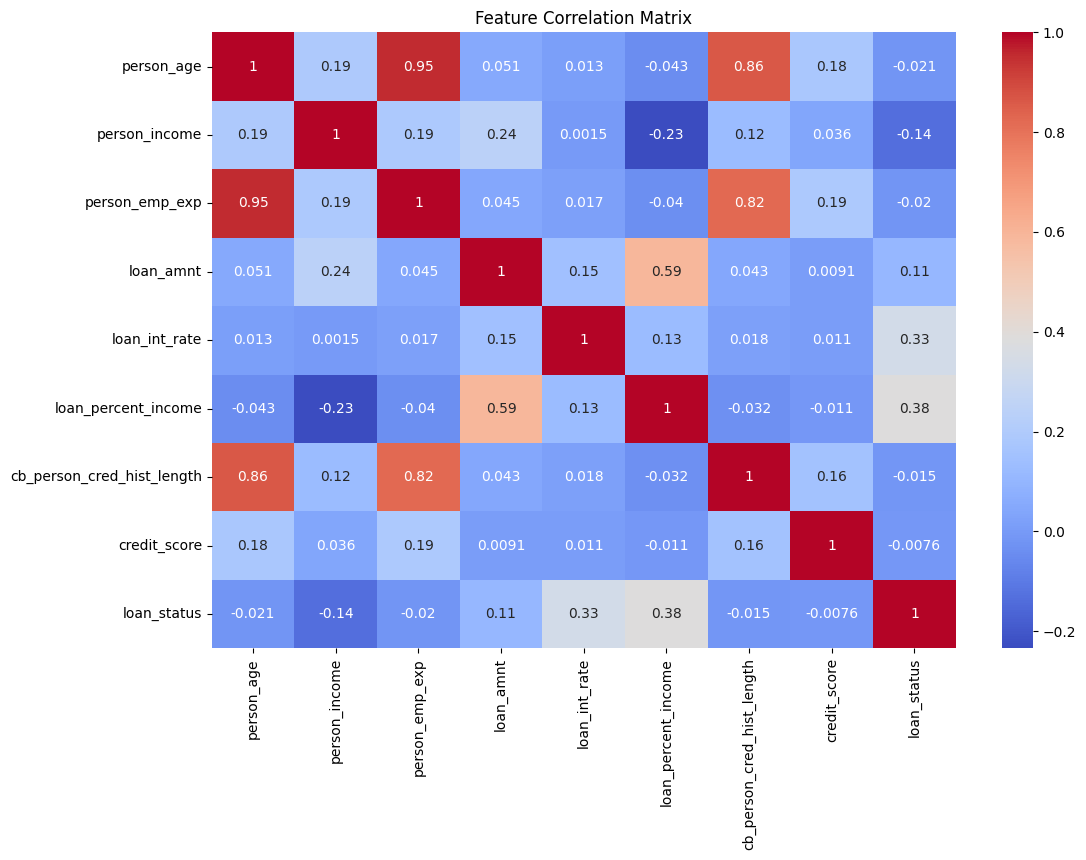

In [21]:
plt.figure(figsize=(12, 8))
# Calculate correlation only for numeric features
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

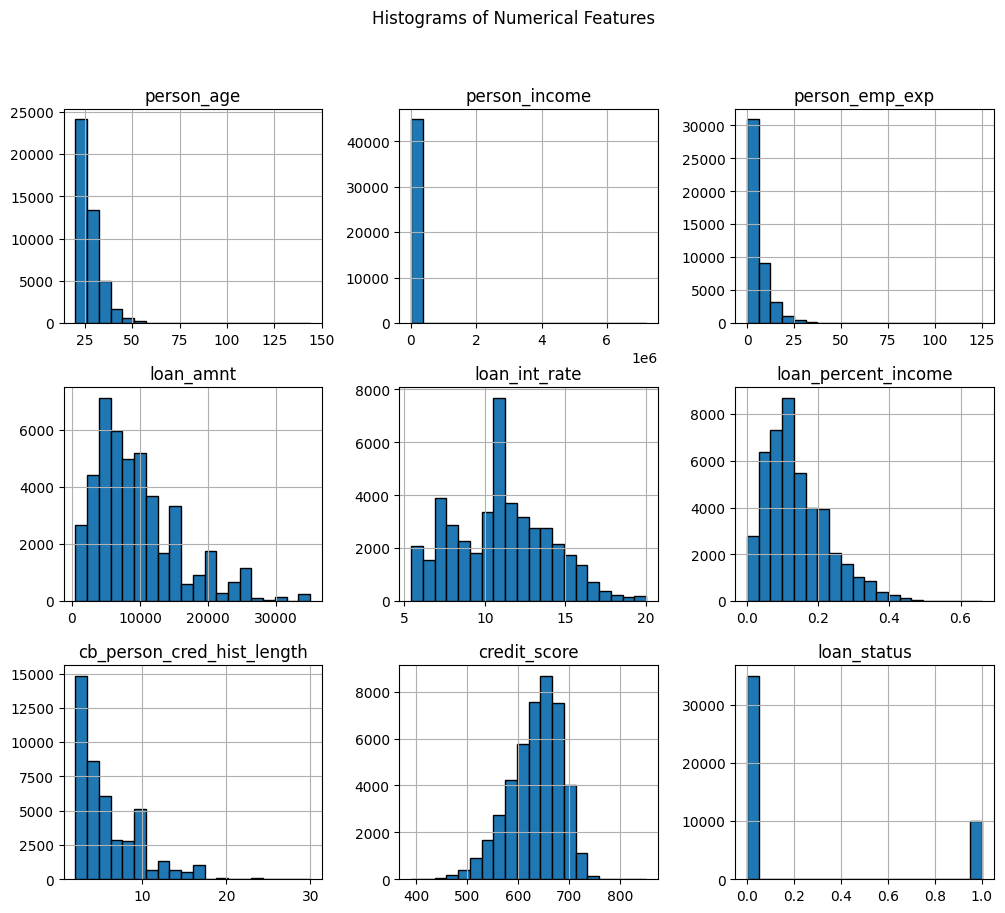

In [45]:
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

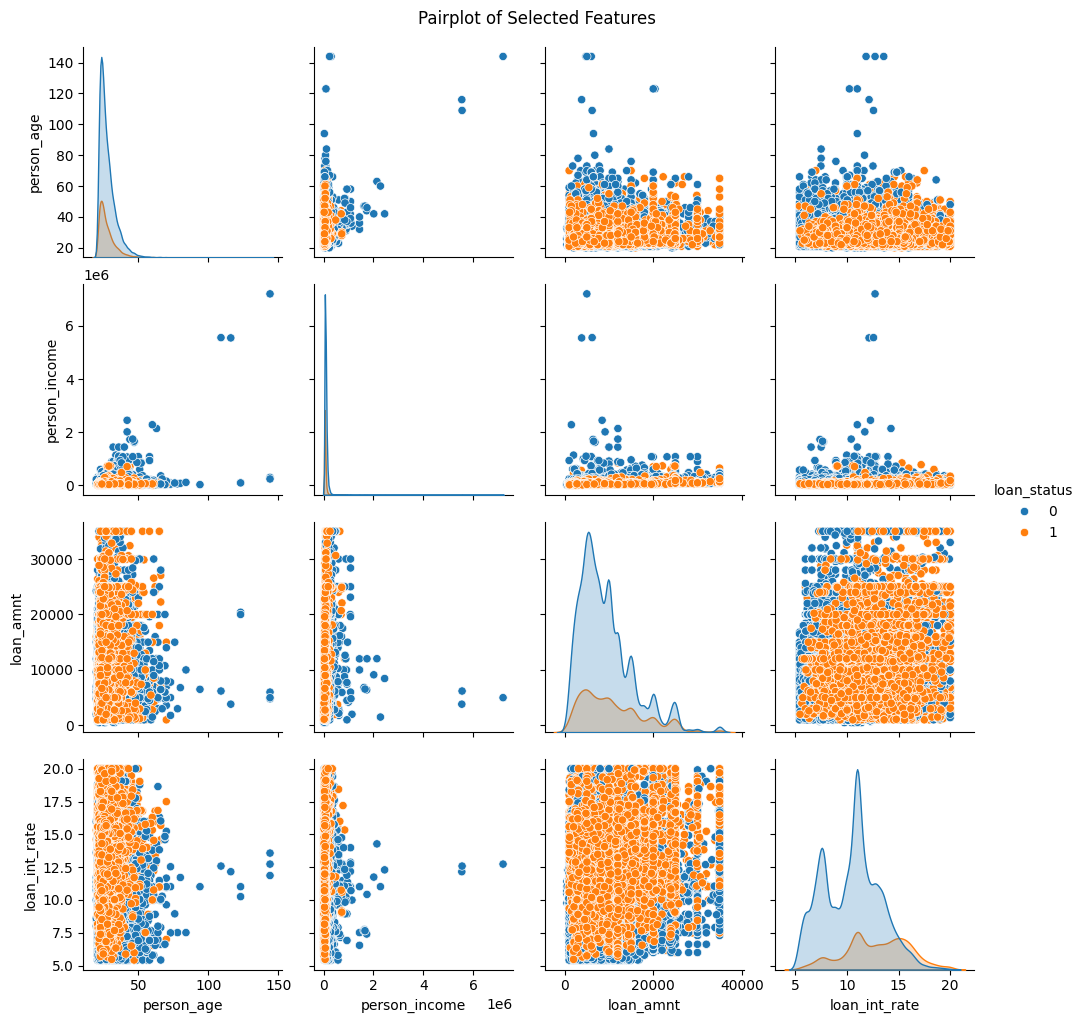

In [ ]:
# Pairplot for selected important features
selected_plot_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_status']
sns.pairplot(df[selected_plot_features], hue='loan_status')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [ ]:
# Handling Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)


In [ ]:
# Data Preprocessing
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

In [ ]:
# Defining Features and Target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression from Scratch (Sigmoid Function)Model 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
    return theta

In [ ]:
# Adding intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = np.zeros(X_train_b.shape[1])
theta = gradient_descent(X_train_b, y_train.values, theta, alpha=0.01, iterations=1000)


In [ ]:
# Making Predictions
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
pred_probs = sigmoid(X_test_b.dot(theta))
y_pred_scratch = (pred_probs >= 0.5).astype(int)
print("\nLogistic Regression (Scratch) Accuracy:", accuracy_score(y_test, y_pred_scratch))


Logistic Regression (Scratch) Accuracy: 0.8841111111111111


In [ ]:
# Logistic Regression (Sklearn)Model 2
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print("\nLogistic Regression (Sklearn) Accuracy:", log_reg_acc)


Logistic Regression (Sklearn) Accuracy: 0.8901111111111111


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.9273333333333333


In [ ]:
# Comparing Model Performance
best_initial_model = "Logistic Regression" if log_reg_acc > rf_acc else "Random Forest"
print(f"\nBest Initial Model: {best_initial_model}")


Best Initial Model: Random Forest


In [ ]:
# Hyperparameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
gs_rf.fit(X_train, y_train)
best_rf = gs_rf.best_estimator_
print("\nBest Parameters for Random Forest:", gs_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}


In [ ]:
# Feature Selection
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
selected_features = feature_importances.nlargest(10).index
print("\nSelected Features for Final Model:", list(selected_features))
X_train_selected = X_train[:, [X.columns.get_loc(c) for c in selected_features]]
X_test_selected = X_test[:, [X.columns.get_loc(c) for c in selected_features]]


Selected Features for Final Model: ['previous_loan_defaults_on_file', 'loan_percent_income', 'loan_int_rate', 'person_income', 'person_home_ownership', 'loan_amnt', 'credit_score', 'loan_intent', 'person_age', 'person_emp_exp']


In [ ]:
# Final Model Training
best_rf.fit(X_train_selected, y_train)
y_pred_final = best_rf.predict(X_test_selected)
final_model_acc = accuracy_score(y_test, y_pred_final)

In [ ]:
# Performance Comparison
print(f"\nFinal Model Accuracy: {final_model_acc}")
print(f"\nPerformance Improvement: {final_model_acc - max(log_reg_acc, rf_acc)}")



Final Model Accuracy: 0.9262222222222222

Performance Improvement: -0.0011111111111111738


In [ ]:
# Evaluation Metrics
print("\nPrecision:", precision_score(y_test, y_pred_final))
print("\nRecall:", recall_score(y_test, y_pred_final))
print("\nF1 Score:", f1_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))


Precision: 0.8772421524663677

Recall: 0.7786069651741293

F1 Score: 0.8249868212967844

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.88      0.78      0.82      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.92      0.93      0.92      9000


Confusion Matrix:
 [[6771  219]
 [ 445 1565]]
